In [3]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [224]:
np.arctan(+np.inf)/np.pi+0.5

1.0

In [266]:
# See https://en.wikipedia.org/wiki/Domain_coloring
# from https://stackoverflow.com/questions/17044052/mathplotlib-imshow-complex-2d-array
from colorsys import hls_to_rgb

def colorize(z, log=False):
    '''
    Turn the array z of complex numbers into an array of rgb values where
    the hue is determined by the phase and the lightness is determined by
    the magnitude or the log of the magnitude
    '''
    n,m = z.shape
    c = np.zeros((n,m,3))
    # Infinity and non-a-number entries will be turned into something that won't throw errors
    c[np.isinf(z)] = (1.0, 1.0, 1.0)
    c[np.isnan(z)] = (0.5, 0.5, 0.5)
    
    idx = ~(np.isinf(z) + np.isnan(z))  # indicies that contain finite numbers
    # First get the hue based on the phase (angle) of the complex number
    A = (np.angle(z[idx]) + np.pi) / (2*np.pi)
    A = (A + 0.5) % 1.0
    # Now get the lightness based on the magnitude or log(magnitude)
    if log:
        #v = np.arctan(np.log(np.abs(z[idx])))/np.pi+0.5  # goes from 0 to 1 when log(abs(z)) goes -inf to +inf
        v = np.log(np.abs(z[idx]))
        # Rescale to the middle 99.9 percentile and clip off the outliers
        low  = np.percentile(v, 1)
        high = np.percentile(v,99.99)
        B = (v-low)/(high-low)  # rescale
        B[B<0] = 0.0
        B[B>1] = 1.0
        print(np.min(B), np.max(B))
    else:
        #B = 1.0 - 1.0/(1.0+abs(z[idx])**0.3)
        B = 1.0 - 1.0/(1.0+abs(z[idx])**0.6)  # the exponent must be less than 0
        #B = 2/np.pi*np.arctan(abs(z[idx]))
    c[idx] = [hls_to_rgb(a, b, 0.8) for a,b in zip(A,B)]
    return c

<IPython.core.display.Javascript object>


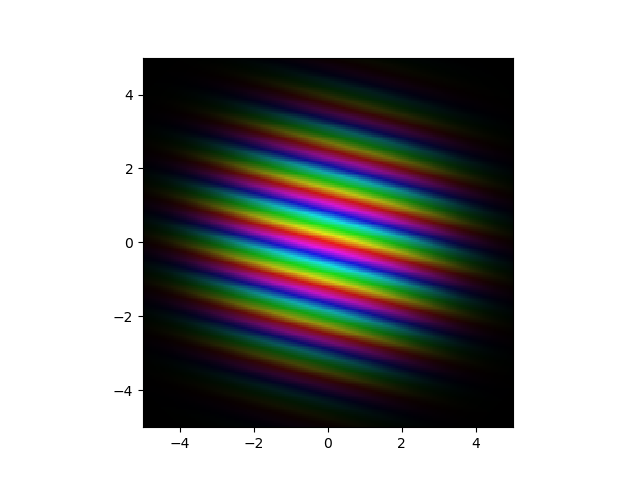

In [456]:
N = 200
A = np.zeros((N,N),dtype='complex')
axis_x = np.linspace(-5,5,N)
axis_y = np.linspace(-5,5,N)
X,Y = np.meshgrid(axis_x,axis_y)  # Two 2D arrays, which change either in x or y directions
Z = X + Y*1j  # a 2D array where each entry is the complex number x+iy.
R = np.abs(Z)

#A = 1/(Z+1j)**2 + 1/(Z-2)**2
#A = np.exp(-1j*Z)
A = np.exp(2*np.pi*1j*(0.2*X+0.8*Y))*np.exp(-R**2/2**2)

# Plot the array "A" using colorize
figure()
imshow(colorize(A), interpolation='none',extent=(-5,5,-5,5),origin='lower')

<IPython.core.display.Javascript object>


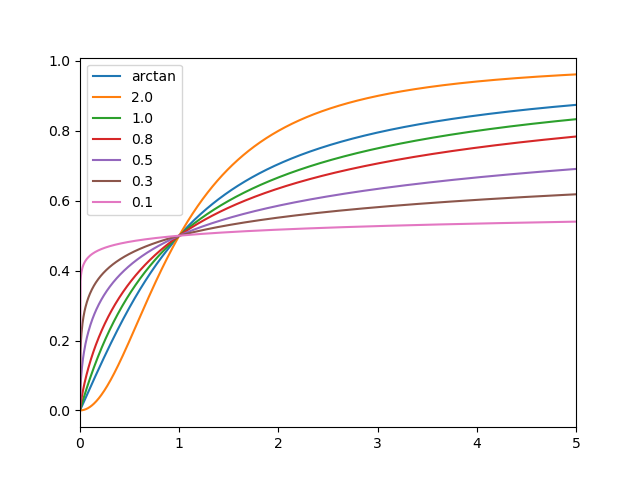

(0.0, 5.0)

In [268]:
# Explore the possible exponent mappings
figure()
N = 1000
x = np.linspace(0,5,N)
f = 2/np.pi*np.arctan(abs(x))
plot(x, f, label='arctan')
for a in reversed([0.1, 0.3, 0.5, 0.8, 1.0, 2.0]):
    f = 1.0 - 1.0/(1.0+x**a)
    plot(x, f, label='%0.1f'%a)
legend()
xlim(min(x), max(x))

In [44]:
plot?

<IPython.core.display.Javascript object>


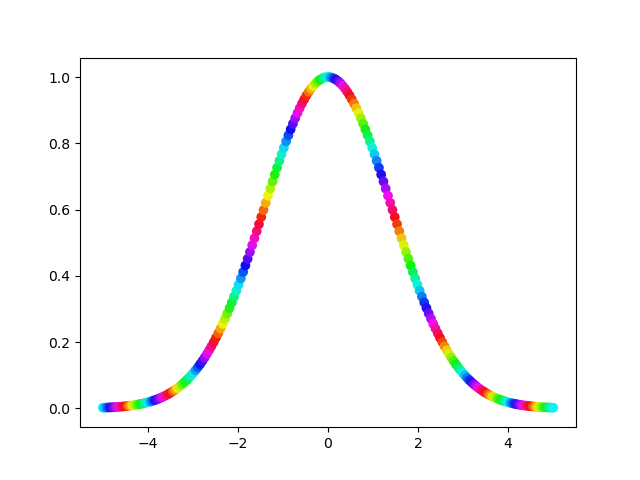

In [269]:
# 1D complex plot
figure()
N = 200
x = np.linspace(-5,5,N)
f = np.exp(2*np.pi*1j*x)*np.exp(-x**2/4)
hue = (np.angle(f) + np.pi) / (2*np.pi)
c = [hls_to_rgb(h, 0.5, 0.9) for h in hue]
scatter(x, abs(f), color=c)
#stem(x, abs(f), linefmt='grey', markerfmt='none', basefmt='none', use_line_collection=True)

In [58]:
stem?

<IPython.core.display.Javascript object>


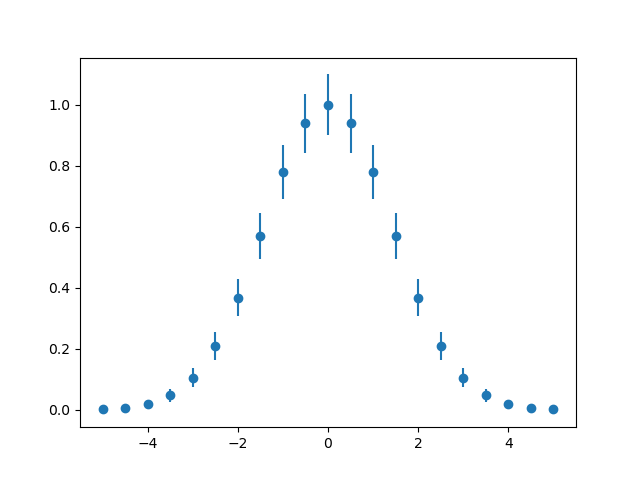

<ErrorbarContainer object of 3 artists>

In [270]:
figure()
N = 21
x = np.linspace(-5,5,N)
f = np.exp(2*np.pi*1j*x)*np.exp(-x**2/4)
y = abs(f)
yerr = sqrt(y)/10
errorbar(x, y, yerr, fmt='o')

In [68]:
errorbar?

In [271]:
# FFT, filter, IFFT
#img_rgb = imread('fourier_square_jacket.jpg')
img_rgb = imread('SandstoneBricks.jpg')
img = mean(img_rgb,axis=2)
NY,NX = img.shape  # Note the annoying convention that the first index, being the array's row, is Y, not X
NX,NY

(500, 375)

<IPython.core.display.Javascript object>


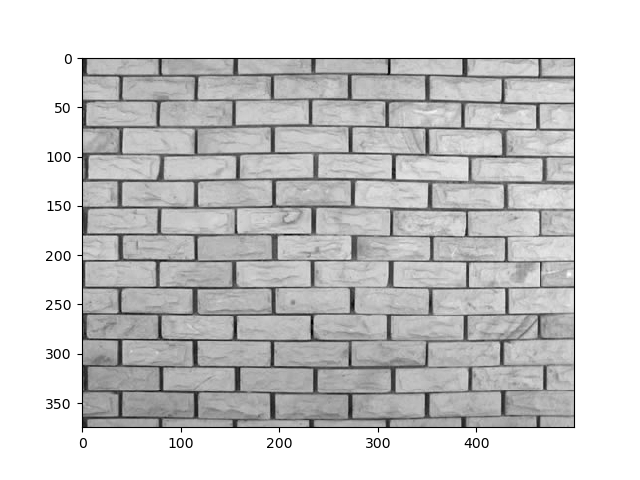

In [272]:
figure()
imshow(img, cmap='gray')

<IPython.core.display.Javascript object>


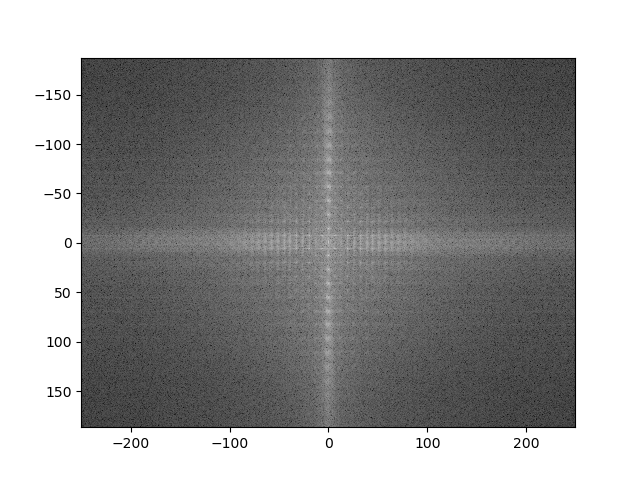

In [273]:
img_fft = fftshift(fft.fft2(img))
figure()
imshow(log(abs(img_fft)), cmap='gray', extent=(-NX/2,NX/2-1,NY/2-1,-NY/2))

<IPython.core.display.Javascript object>


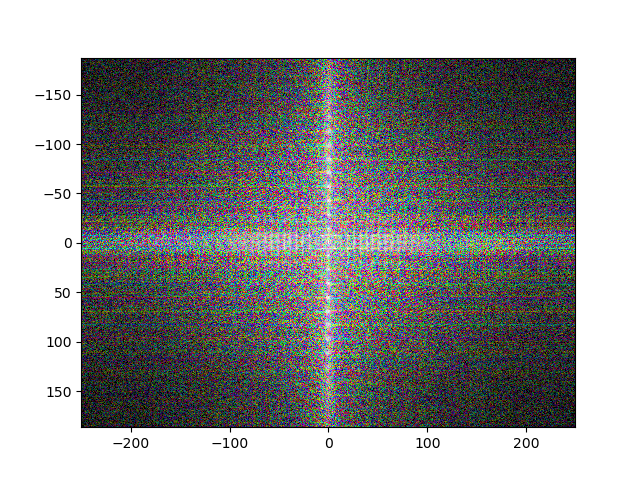

0.0 1.0


In [274]:
figure()
imshow(colorize(img_fft,log=True), interpolation='none', extent=(-NX/2,NX/2-1,NY/2-1,-NY/2))

<IPython.core.display.Javascript object>


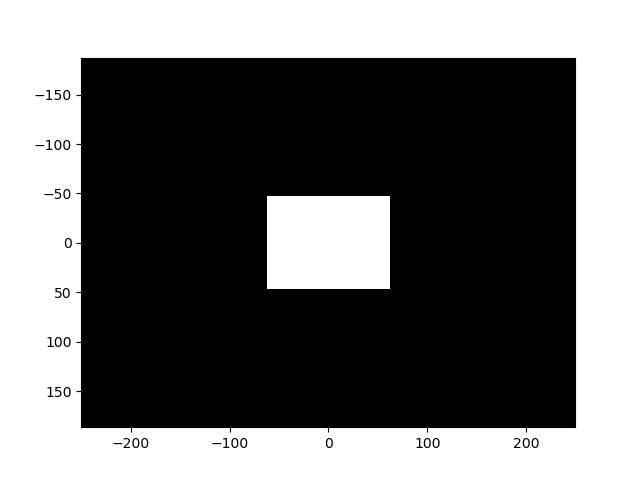

In [275]:
axis_x = arange(-NX/2,NX/2)
axis_y = arange(-NY/2,NY/2)
X,Y = np.meshgrid(axis_x,axis_y)  # Two 2D arrays, which change either in x or y directions

mask = zeros((NY,NX))
mask[(abs(X)<=NX/8)*(abs(Y)<=NY/8)] = 1
figure()
imshow(mask, cmap='gray', extent=(-NX/2,NX/2-1,NY/2-1,-NY/2))

<IPython.core.display.Javascript object>


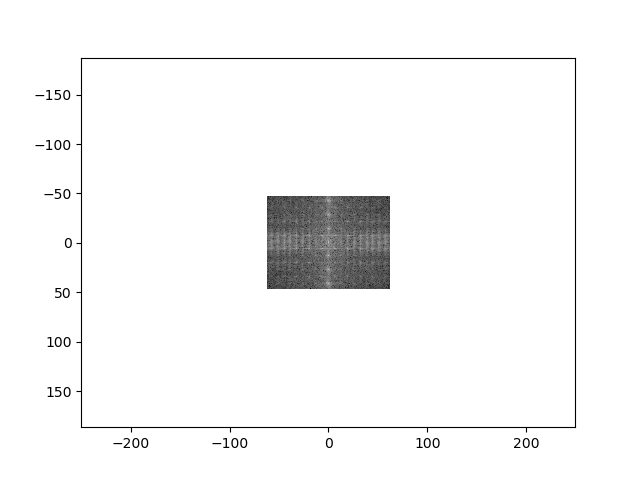

<ipython-input-276-6890aadff59c>:2: RuntimeWarning: divide by zero encountered in log
  imshow(log(abs(img_fft*mask)), cmap='gray', extent=(-NX/2,NX/2-1,NY/2-1,-NY/2))


In [276]:
figure()
imshow(log(abs(img_fft*mask)), cmap='gray', extent=(-NX/2,NX/2-1,NY/2-1,-NY/2))

<IPython.core.display.Javascript object>


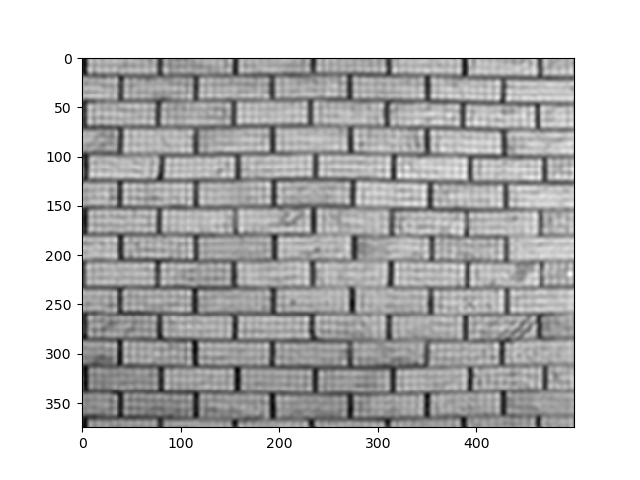

In [277]:
filtered = fft.ifft2(ifftshift(img_fft*mask))
figure()
imshow(filtered.real, cmap='gray')

<IPython.core.display.Javascript object>


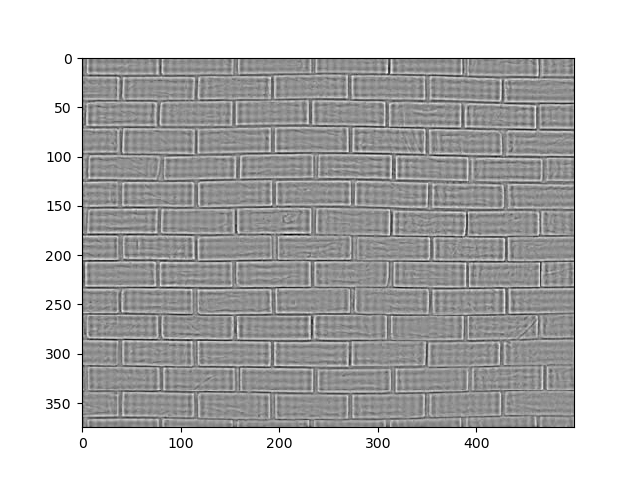

In [278]:
highpass = 1-mask
filtered = fft.ifft2(ifftshift(img_fft*highpass))
figure()
imshow(filtered.real, cmap='gray')

<IPython.core.display.Javascript object>


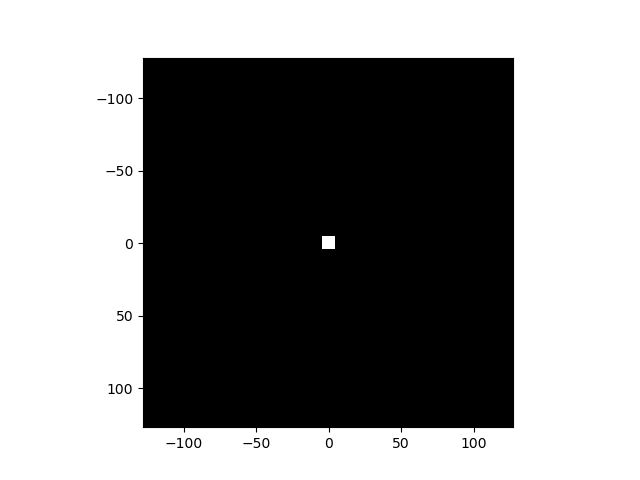

In [293]:
NX,NY = 256,256
axis_x = arange(-NX/2,NX/2)
axis_y = arange(-NY/2,NY/2)
X,Y = np.meshgrid(axis_x,axis_y)  # Two 2D arrays, which change either in x or y directions

mask = zeros((NY,NX))
mask[(abs(X)<=NX/64)*(abs(Y)<=NY/64)] = 1
figure()
imshow(mask, cmap='gray', extent=(-NX/2,NX/2-1,NY/2-1,-NY/2))

<IPython.core.display.Javascript object>


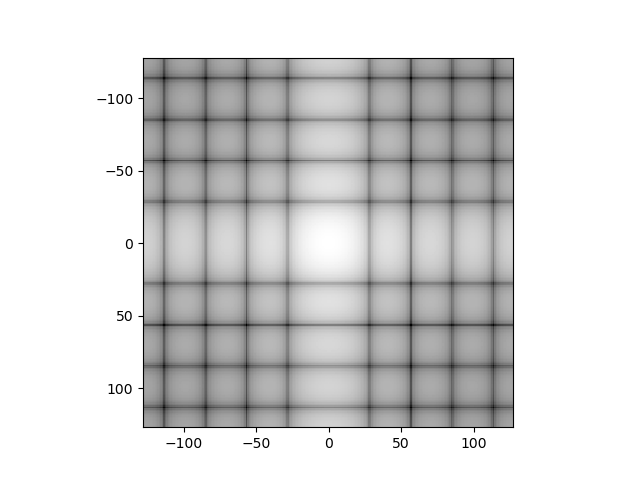

In [298]:
mask_fft = fftshift(fft.fft2(fftshift(mask)))
figure()
imshow(log(abs(mask_fft)), cmap='gray', extent=(-NX/2,NX/2-1,NY/2-1,-NY/2))

<IPython.core.display.Javascript object>


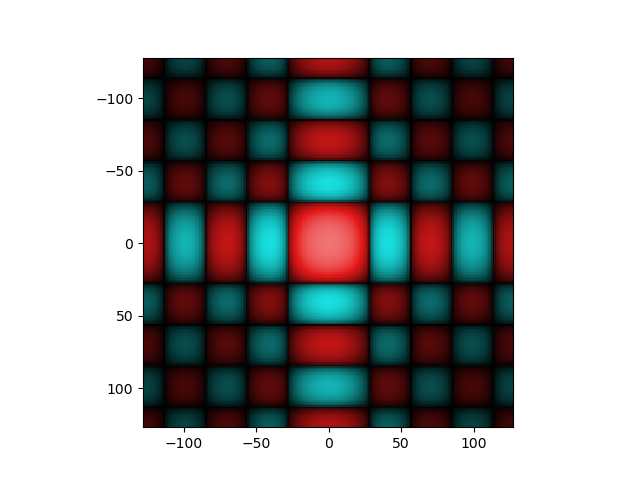

In [303]:
figure()
imshow(colorize(mask_fft/20,log=False), interpolation='none', extent=(-NX/2,NX/2-1,NY/2-1,-NY/2))

<IPython.core.display.Javascript object>


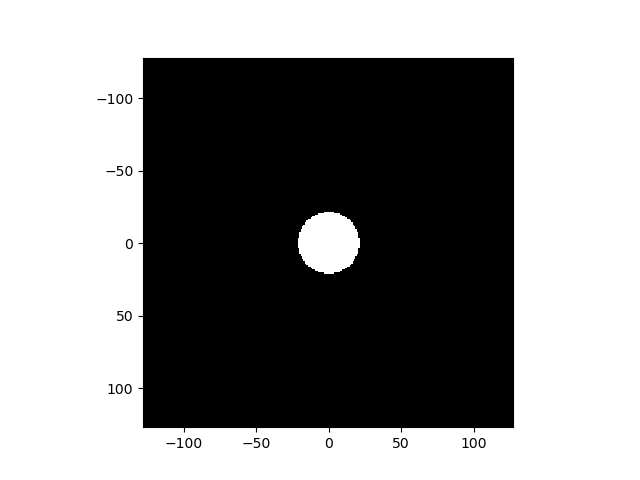

In [317]:
NX,NY = 256,256
axis_x = arange(-NX/2,NX/2)
axis_y = arange(-NY/2,NY/2)
X,Y = np.meshgrid(axis_x,axis_y)  # Two 2D arrays, which change either in x or y directions

mask = zeros((NY,NX))
R = np.sqrt(X**2+Y**2)
mask[R<NX/12] = 1
figure()
imshow(mask, cmap='gray', extent=(-NX/2,NX/2-1,NY/2-1,-NY/2))

<IPython.core.display.Javascript object>


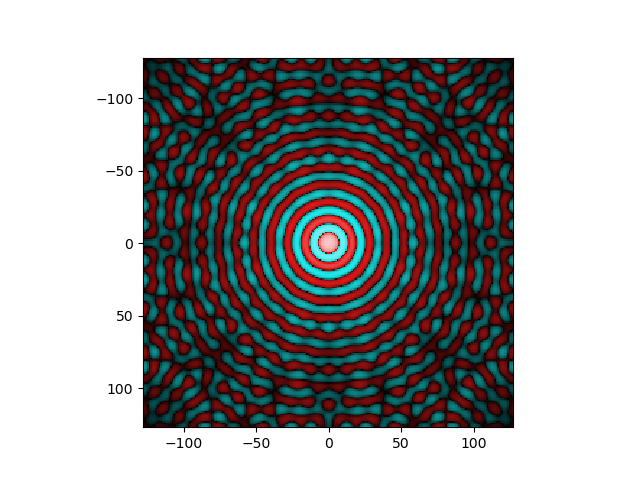

In [319]:
mask_fft = fftshift(fft.fft2(fftshift(mask)))
figure()
imshow(colorize(mask_fft/50,log=False), interpolation='none', extent=(-NX/2,NX/2-1,NY/2-1,-NY/2))

<IPython.core.display.Javascript object>


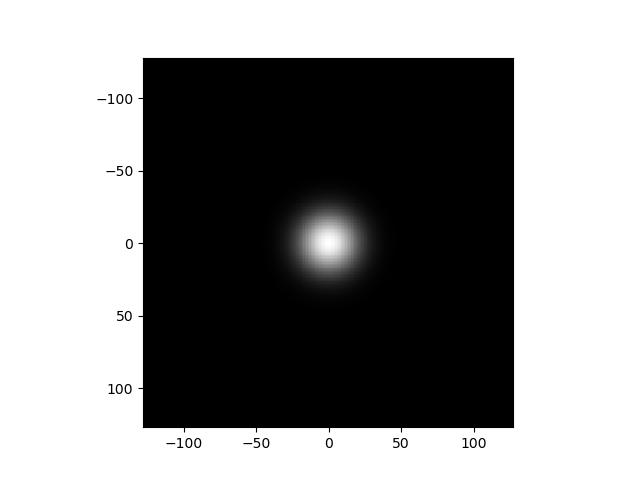

In [327]:
NX,NY = 256,256
axis_x = arange(-NX/2,NX/2)
axis_y = arange(-NY/2,NY/2)
X,Y = np.meshgrid(axis_x,axis_y)  # Two 2D arrays, which change either in x or y directions

R = np.sqrt(X**2+Y**2)
sigma = 20
mask = np.exp(-R**2/(sigma**2))
figure()
imshow(mask, cmap='gray', extent=(-NX/2,NX/2-1,NY/2-1,-NY/2))

<IPython.core.display.Javascript object>


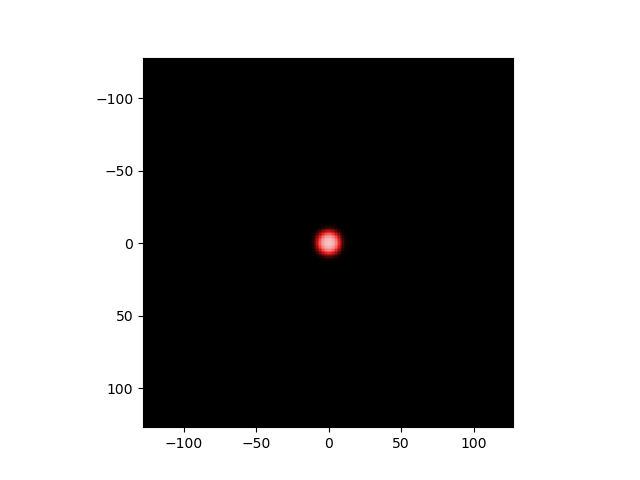

In [328]:
mask_fft = fftshift(fft.fft2(fftshift(mask)))
figure()
imshow(colorize(mask_fft/50,log=False), interpolation='none', extent=(-NX/2,NX/2-1,NY/2-1,-NY/2))

Diffraction

<IPython.core.display.Javascript object>


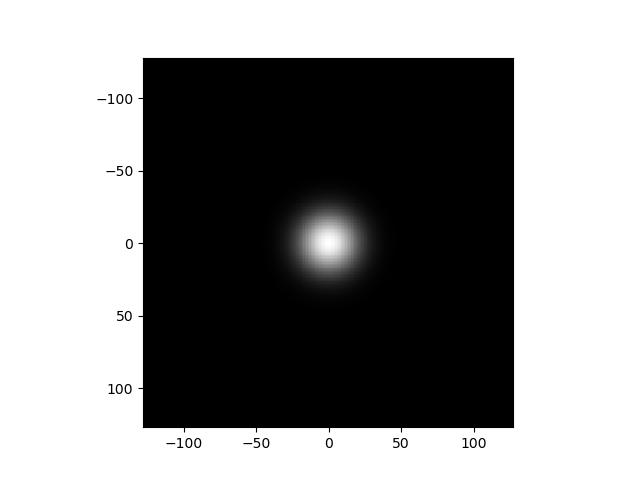

In [529]:
# Diffraction by wave forward propagation
NX,NY = 256,256
axis_x = arange(-NX/2,NX/2)
axis_y = arange(-NY/2,NY/2)
X,Y = np.meshgrid(axis_x,axis_y)  # Two 2D arrays, which change either in x or y directions
R = np.sqrt(X**2+Y**2)

mask = zeros((NY,NX))
#mask[(abs(X)<=NX/32)*(abs(Y)<=NY/32)] = 1  # square
#mask[R**2 < (NX/8)**2] = 1  # circle
mask = np.exp(-R**2/(20**2))  # gauss
figure()
imshow(mask, cmap='gray', extent=(-NX/2,NX/2-1,NY/2-1,-NY/2))

In [530]:
# imagine a screen 
z = 10.0 # a distance z away from origin, where intial condition lives
lam = 1 # and the light wave of wavelength lam
k = 2.0*np.pi/lam
initial = mask
initial_fft = fft.fft2(initial)  # check sign of FFT
dx = np.mean(np.diff(axis_x))  # sample spacing along x axis
dy = np.mean(np.diff(axis_y))  # sample spacing along y axis
axis_u = fftfreq(len(axis_x),dx)
axis_v = fftfreq(len(axis_y),dy)
U,V = np.meshgrid(axis_u,axis_v)
KX = U*2.0*np.pi
KY = V*2.0*np.pi
KZ = np.sqrt(k**2 - KX**2 - KY**2)
final_fft = initial_fft * np.exp(1j*KZ*z)  # check sign of this transfer function
final = fft.ifft2(final_fft)

<IPython.core.display.Javascript object>


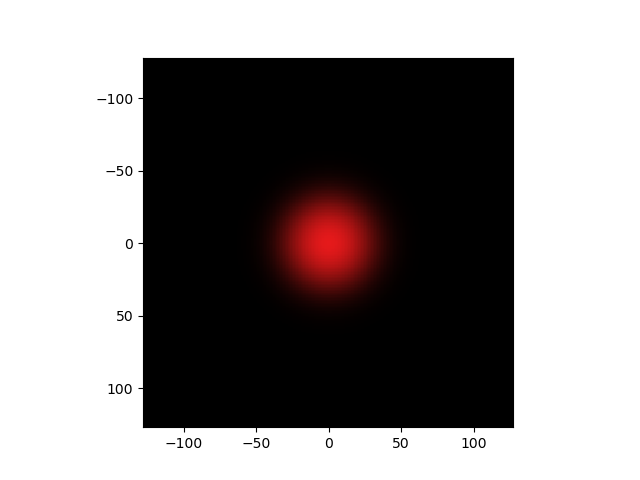

In [531]:
figure()
imshow(colorize(final,log=False), interpolation='none', extent=(-NX/2,NX/2-1,NY/2-1,-NY/2))

<IPython.core.display.Javascript object>


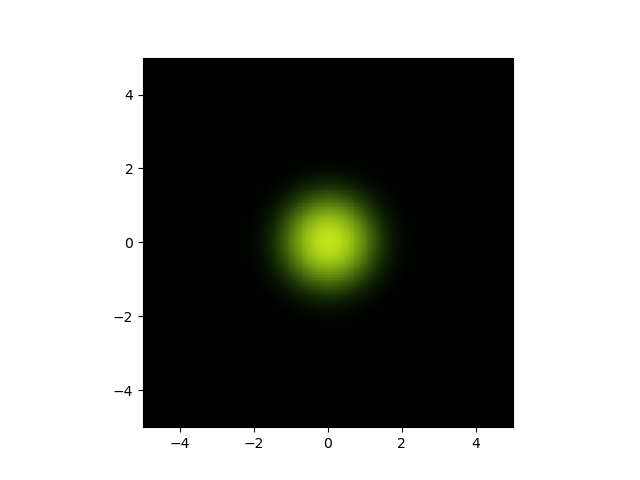

In [532]:
t = np.linspace(0,1000,num=100)

fig, ax = plt.subplots()
im = ax.imshow(colorize(final), interpolation='none',extent=(-5,5,-5,5),origin='lower')

def animate(i):
    z = t[i]
    final_fft = initial_fft * np.exp(1j*KZ*z)  # check sign of this transfer function
    final = fft.ifft2(final_fft)
    im.set_data(colorize(final))

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

0.05025125628140704

<IPython.core.display.Javascript object>


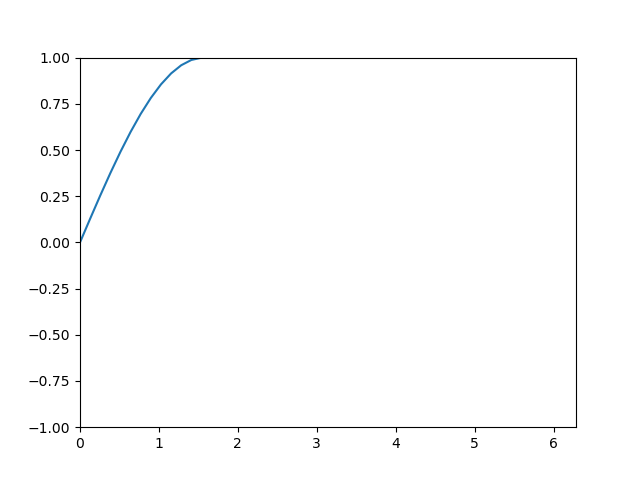

In [410]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

def animate(i):
    l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

<IPython.core.display.Javascript object>


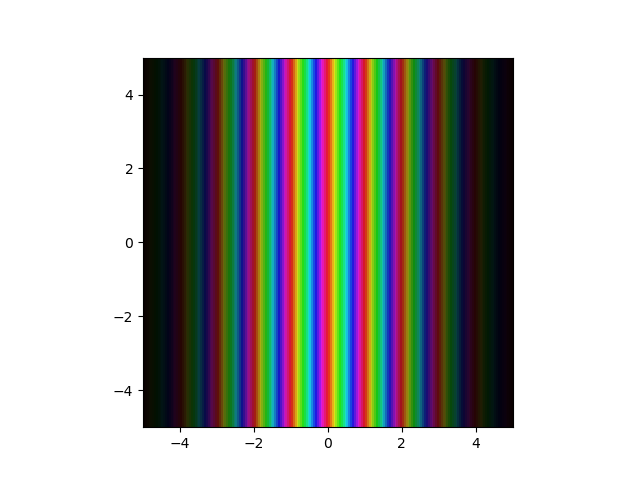

In [497]:
N = 200
A = np.zeros((N,N),dtype='complex')
axis_x = np.linspace(-5,5,N)
axis_y = np.linspace(-5,5,N)
X,Y = np.meshgrid(axis_x,axis_y)  # Two 2D arrays, which change either in x or y directions
Z = X + Y*1j  # a 2D array where each entry is the complex number x+iy.

#A = 1/(Z+1j)**2 + 1/(Z-2)**2
#A = np.exp(-1j*Z)
A = np.exp(2*np.pi*1j*X)*np.exp(-X**2/4)

# Plot the array "A" using colorize
figure()
imshow(colorize(A), interpolation='none',extent=(-5,5,-5,5),origin='lower')

<IPython.core.display.Javascript object>


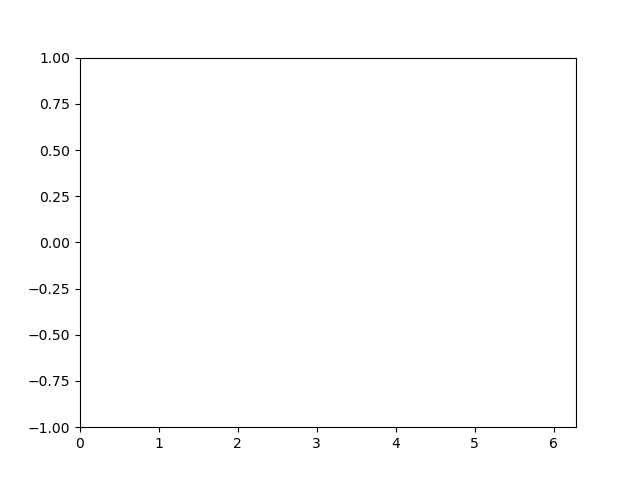

In [498]:
fig, ax = plt.subplots()
ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

<IPython.core.display.Javascript object>


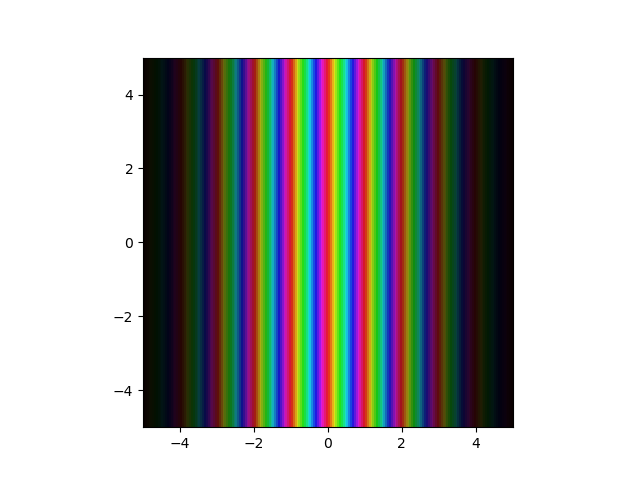

In [413]:
figure()
im = imshow(colorize(A), interpolation='none',extent=(-5,5,-5,5),origin='lower')

In [414]:
im

<IPython.core.display.Javascript object>


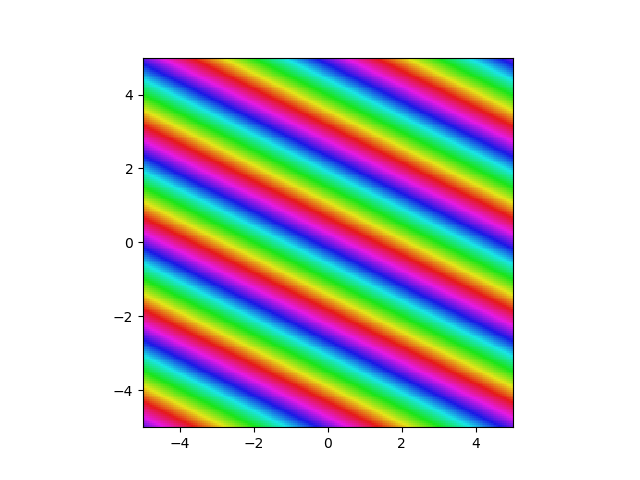

In [499]:
t = np.linspace(0,1,num=20)

fig, ax = plt.subplots()
im = ax.imshow(colorize(A), interpolation='none',extent=(-5,5,-5,5),origin='lower')

def animate(i):
    A = np.exp(2*np.pi*1j*(0.2*X+0.4*Y-t[i]))
    im.set_data(colorize(A))

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

In [423]:
ani

In [424]:
from IPython.display import HTML
HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>


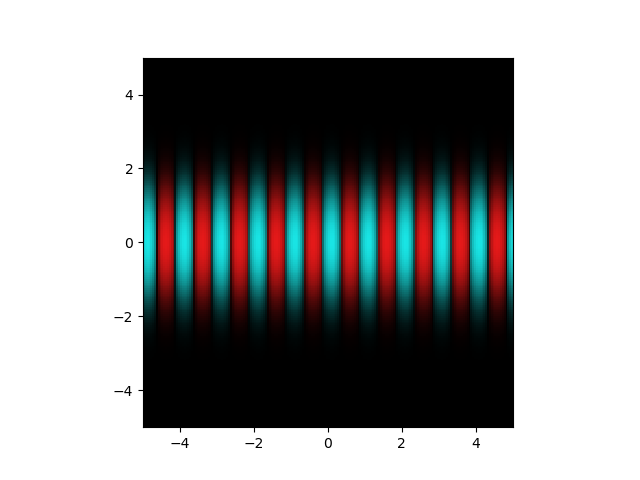

In [438]:
t = np.linspace(0,1,num=10,endpoint=False)

fig, ax = plt.subplots()
im = ax.imshow(colorize(A), interpolation='none',extent=(-5,5,-5,5),origin='lower')

def animate(i):
    A = np.exp(2*np.pi*1j*(X-t[i]))*np.exp(-Y**2/1**2)
    im.set_data(colorize(A.real))

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

In [439]:
fft.test?